## Problem Understanding, Formulation, and Significance

### Problem Description
In this analysis, we focus on understanding the impact of monthly and seasonal changes on stock market performance, particularly for the S&P 500 index. By examining historical data, we aim to identify patterns in stock performance across different months and seasons. This includes analyzing how monthly and seasonal variations affect the stock market, and identifying periods of significant positive and negative performance.

### Significance
Analyzing these trends is crucial for several reasons:
- **Investment Decisions**: Understanding when the market tends to perform better or worse can help investors make informed decisions about when to buy or sell stocks.
- **Strategic Planning**: Investors and financial analysts can use this information to adjust their strategies based on historical trends, potentially maximizing returns and minimizing risks.
- **Market Behavior Insights**: Recognizing seasonal and monthly patterns provides insights into market behavior, which can be useful for forecasting future performance.

### Objectives
The primary objectives of this analysis are:
1. **Identify Best and Worst Months**: Determine the top months with the highest positive and negative changes in stock performance. This helps in pinpointing when the market is most and least favorable.
2. **Understand Seasonal Trends**: Analyze seasonal performance trends to discern how different seasons impact stock performance. This involves evaluating average performance across seasons and understanding the implications for investment strategies.

### Note on File Paths
To ensure that you can run the notebook smoothly, you need to load the data from the correct file paths. The paths provided here are relative to the `data` directory. If you are using a different directory structure, adjust the paths accordingly.

- **Raw Data Files**:
  - Yahoo Finance Data: `data/raw/^SPX.csv`
  - Investing.com Data: `data/raw/S&P 500 Historical Data.csv`

- **Processed Data File**:
  - Merged and Cleaned Data: `data/processed/merged_cleaned_data.csv`

If you are running this Jupyter notebook on a different computer, make sure to update these paths to match your local directory structure. For instance:

```python
# Define file paths using raw strings
file_path_yahoo = r'path_to_your_directory\data\raw\^SPX.csv'
file_path_investing = r'path_to_your_directory\data\raw\S&P 500 Historical Data.csv'
processed_file_path = r'path_to_your_directory\data\processed\merged_cleaned_data.csv'


In [121]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Data Loading and Preparation

This section of the code focuses on:

1. **Loading Data**: Import stock market data from Yahoo Finance and Investing.com into separate DataFrames.
2. **Date Formatting**: Convert the 'Date' column in each dataset to a datetime format for accurate time-based analysis.
3. **Sorting**: Arrange both datasets chronologically by sorting them based on the 'Date' column.
4. **Initial Data Inspection**: Display the first five rows of each dataset to confirm correct data loading and sorting.


In [122]:
# Define file paths using raw strings
file_path_yahoo = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\^SPX.csv'
file_path_investing = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\S&P 500 Historical Data.csv'

# Load the datasets
df_yahoo = pd.read_csv(file_path_yahoo)  # Data from Yahoo Finance
df_investing = pd.read_csv(file_path_investing)  # Data from Investing.com

# Ensure the date column is in datetime format
# Assuming the date column is named 'Date' in both datasets. Adjust if needed.

df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'], errors='coerce')
df_investing['Date'] = pd.to_datetime(df_investing['Date'], errors='coerce')

# Sort datasets by date
df_yahoo_sorted = df_yahoo.sort_values(by='Date')
df_investing_sorted = df_investing.sort_values(by='Date')

# Display the first 5 rows from the earliest record
print("First 5 rows of Yahoo Finance dataset (sorted by earliest date):")
display(df_yahoo_sorted.head())

print("\nFirst 5 rows of Investing.com dataset (sorted by earliest date):")
display(df_investing_sorted.head())


First 5 rows of Yahoo Finance dataset (sorted by earliest date):


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,1131.130005,32820000000
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000



First 5 rows of Investing.com dataset (sorted by earliest date):


,Date,Price,Open,High,Low,Vol.,Change %
240,2004-01-01,"1,131.10","1,111.90","1,155.40","1,105.10",NaN,1.73%
239,2004-02-01,"1,144.90","1,131.10","1,159.00","1,124.40",NaN,1.22%
238,2004-03-01,"1,126.20","1,144.90","1,163.20","1,087.10",NaN,-1.63%
237,2004-04-01,"1,107.30","1,126.20","1,150.60","1,107.20",NaN,-1.68%
236,2004-05-01,"1,120.70","1,107.30","1,127.70","1,076.30",NaN,1.21%


### Data Merging and Inspection

In this section, we:

1. **Load Datasets**: Import data from Yahoo Finance and Investing.com into two separate DataFrames.
2. **Date Conversion**: Convert the 'Date' columns in both datasets to datetime format for consistent time-based operations.
3. **Sorting**: Sort both datasets by date to ensure chronological order.
4. **Merge Data**: Combine the two datasets on the 'Date' column to create a unified DataFrame, aligning data from both sources.
5. **Initial Inspection**: Display the first few rows and column names of the merged dataset to verify successful merging and check the available data.


In [123]:
# Define file paths using raw strings
file_path_yahoo = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\^SPX.csv'
file_path_investing = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\S&P 500 Historical Data.csv'

# Load the datasets
df_yahoo = pd.read_csv(file_path_yahoo)  # Data from Yahoo Finance
df_investing = pd.read_csv(file_path_investing)  # Data from Investing.com

# Ensure the date column is in datetime format
df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'], errors='coerce')
df_investing['Date'] = pd.to_datetime(df_investing['Date'], errors='coerce')

# Sort datasets by date
df_yahoo_sorted = df_yahoo.sort_values(by='Date')
df_investing_sorted = df_investing.sort_values(by='Date')

# Merge the datasets on the 'Date' column
merged_df = pd.merge(df_yahoo_sorted, df_investing_sorted, on='Date', how='inner')

# Display the first few rows of the merged dataset
print("First few rows of the merged dataset:")
display(merged_df.head())

# Display the column names of the merged dataset
print("\nColumn names in the merged dataset:")
print(merged_df.columns.tolist())


First few rows of the merged dataset:


,Date,Open_x,High_x,Low_x,Close,Adj Close,Volume,Price,Open_y,High_y,Low_y,Vol.,Change %
0,2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,1131.130005,32820000000,"1,131.10","1,111.90","1,155.40","1,105.10",NaN,1.73%
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000,"1,144.90","1,131.10","1,159.00","1,124.40",NaN,1.22%
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000,"1,126.20","1,144.90","1,163.20","1,087.10",NaN,-1.63%
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000,"1,107.30","1,126.20","1,150.60","1,107.20",NaN,-1.68%
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000,"1,120.70","1,107.30","1,127.70","1,076.30",NaN,1.21%



Column names in the merged dataset:
['Date', 'Open_x', 'High_x', 'Low_x', 'Close', 'Adj Close', 'Volume', 'Price', 'Open_y', 'High_y', 'Low_y', 'Vol.', 'Change %']


In [124]:
# Merge the datasets on the 'Date' column
merged_df = pd.merge(df_yahoo_sorted, df_investing_sorted, on='Date', how='inner')

# Display the first few rows of the merged dataset
print("\nFirst few rows of the merged dataset:")
print(merged_df.head())

# Display the column names of the merged dataset
print("\nColumn names in the merged dataset:")
print(merged_df.columns.tolist())



First few rows of the merged dataset:
        Date       Open_x       High_x        Low_x        Close    Adj Close  \
0 2004-01-01  1111.920044  1155.380005  1105.079956  1131.130005  1131.130005   
1 2004-02-01  1131.130005  1158.979980  1124.439941  1144.939941  1144.939941   
2 2004-03-01  1144.939941  1163.229980  1087.160034  1126.209961  1126.209961   
3 2004-04-01  1126.209961  1150.569946  1107.229980  1107.300049  1107.300049   
4 2004-05-01  1107.300049  1127.739990  1076.319946  1120.680054  1120.680054   

        Volume     Price    Open_y    High_y     Low_y  Vol. Change %  
0  32820000000  1,131.10  1,111.90  1,155.40  1,105.10   NaN    1.73%  
1  27985600000  1,144.90  1,131.10  1,159.00  1,124.40   NaN    1.22%  
2  33597900000  1,126.20  1,144.90  1,163.20  1,087.10   NaN   -1.63%  
3  31611900000  1,107.30  1,126.20  1,150.60  1,107.20   NaN   -1.68%  
4  29326400000  1,120.70  1,107.30  1,127.70  1,076.30   NaN    1.21%  

Column names in the merged dataset:
['Dat

### Column Name Resolution and Cleanup

In this section, we:

1. **Resolve Column Name Conflicts**: Handle columns with suffixes `_x` and `_y` by keeping the `_y` columns and merging their values into the columns without suffixes. We then drop the `_x` columns.

2. **Remove Columns with All NaN Values**: Eliminate columns that contain only NaN values to clean up the dataset.

3. **Clean Column Names**: Remove the `_y` suffix from remaining column names and drop any specified columns (e.g., 'Adj Close').

4. **Verify Changes**: Display the column names and first few rows of the cleaned dataset to ensure that the changes have been applied correctly.


In [125]:
# Resolve column name conflicts
# For columns with suffixes '_x' and '_y', we keep the '_y' columns and rename them to remove the suffix
for col in merged_df.columns:
    if col.endswith('_x'):
        new_col = col.replace('_x', '')
        if new_col in merged_df.columns:
            # Combine values from the '_y' column and '_x' column
            merged_df[new_col] = merged_df[new_col].combine_first(merged_df[col])
        # Drop the '_x' column
        merged_df.drop(columns=[col], inplace=True)

# Remove columns with all NaN values
merged_df = merged_df.dropna(axis=1, how='all')

# Define a function to remove '_y' suffix from column names and drop specified columns
def remove_suffix_y_and_drop_columns(df, columns_to_drop):
    # Rename columns by removing the '_y' suffix
    df.columns = [col.replace('_y', '') for col in df.columns]
    
    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    return df

# Specify columns to drop
columns_to_drop = ['Adj Close']

# Apply the function to the DataFrame
merged_df = remove_suffix_y_and_drop_columns(merged_df, columns_to_drop)

# Display the column names of the cleaned merged dataset after renaming and dropping columns
print("\nColumn names in the cleaned merged dataset after renaming and dropping:")
print(merged_df.columns.tolist())

# Display the first few rows to verify the changes
print("\nFirst few rows of the cleaned merged dataset:")
print(merged_df.head())



Column names in the cleaned merged dataset after renaming and dropping:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %']

First few rows of the cleaned merged dataset:
        Date        Close       Volume     Price      Open      High  \
0 2004-01-01  1131.130005  32820000000  1,131.10  1,111.90  1,155.40   
1 2004-02-01  1144.939941  27985600000  1,144.90  1,131.10  1,159.00   
2 2004-03-01  1126.209961  33597900000  1,126.20  1,144.90  1,163.20   
3 2004-04-01  1107.300049  31611900000  1,107.30  1,126.20  1,150.60   
4 2004-05-01  1120.680054  29326400000  1,120.70  1,107.30  1,127.70   

        Low Change %  
0  1,105.10    1.73%  
1  1,124.40    1.22%  
2  1,087.10   -1.63%  
3  1,107.20   -1.68%  
4  1,076.30    1.21%  


### Saving the Processed Data

In this section, we:

1. **Define File Path**: Specify the path for saving the cleaned dataset by combining the directory path and filename.

2. **Create Directory**: Ensure that the directory for saving the file exists, creating it if necessary.

3. **Save Data**: Write the cleaned DataFrame to a CSV file in the specified directory.

4. **Verify Save Operation**: Print the file path and column names of the saved dataset, and display the first few rows to confirm that the data was saved correctly.


In [126]:
# Define the path to the directory and file
processed_dir = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\processed'
processed_file_path = os.path.join(processed_dir, 'merged_cleaned_data.csv')

# Create the directory if it doesn't exist
os.makedirs(processed_dir, exist_ok=True)

# Save the cleaned DataFrame to a CSV file
merged_df.to_csv(processed_file_path, index=False)

# Print the column names to verify
print(f"Processed data saved to {processed_file_path}")
print("\nColumn names in the saved dataset:")
print(merged_df.columns.tolist())

# Display the first few rows to verify the saved data
print("\nFirst few rows of the saved dataset:")
print(merged_df.head())


Processed data saved to C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\processed\merged_cleaned_data.csv

Column names in the saved dataset:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %']

First few rows of the saved dataset:
        Date        Close       Volume     Price      Open      High  \
0 2004-01-01  1131.130005  32820000000  1,131.10  1,111.90  1,155.40   
1 2004-02-01  1144.939941  27985600000  1,144.90  1,131.10  1,159.00   
2 2004-03-01  1126.209961  33597900000  1,126.20  1,144.90  1,163.20   
3 2004-04-01  1107.300049  31611900000  1,107.30  1,126.20  1,150.60   
4 2004-05-01  1120.680054  29326400000  1,120.70  1,107.30  1,127.70   

        Low Change %  
0  1,105.10    1.73%  
1  1,124.40    1.22%  
2  1,087.10   -1.63%  
3  1,107.20   -1.68%  
4  1,076.30    1.21%  


### Adding Month Information

In this section, we:

1. **Convert 'Date' Column**: Ensure the 'Date' column is in datetime format, which is essential for extracting date-related information.

2. **Extract Month Names**: Create a new column, 'Month', that contains the full month names extracted from the 'Date' column.

3. **Verify Changes**: Display the first few rows of the dataset to confirm the addition of the 'Month' column and list the updated column names.


In [127]:
# Ensure the 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the month name from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Display the first few rows to verify the changes
print("\nFirst few rows with the new 'Month' column:")
print(merged_df[['Date', 'Month']].head())

# Display the column names to verify the addition
print("\nColumn names after adding 'Month' column:")
print(merged_df.columns.tolist())



First few rows with the new 'Month' column:
        Date     Month
0 2004-01-01   January
1 2004-02-01  February
2 2004-03-01     March
3 2004-04-01     April
4 2004-05-01       May

Column names after adding 'Month' column:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %', 'Month']


### Monthly Change Analysis

In this section, we:

1. **Convert 'Date' Column**: Ensure the 'Date' column is correctly formatted as datetime.

2. **Process 'Change %' Values**: Convert the 'Change %' column to numeric values by removing the '%' sign and changing the datatype to float.

3. **Extract and Use Month Names**: Extract month names from the 'Date' column and group data by month to calculate the average percentage change.

4. **Reorder and Plot Data**: Reorder months to match the calendar year, and plot a bar chart showing the average monthly change. The plot includes annotations for each bar to display the exact average change percentage.


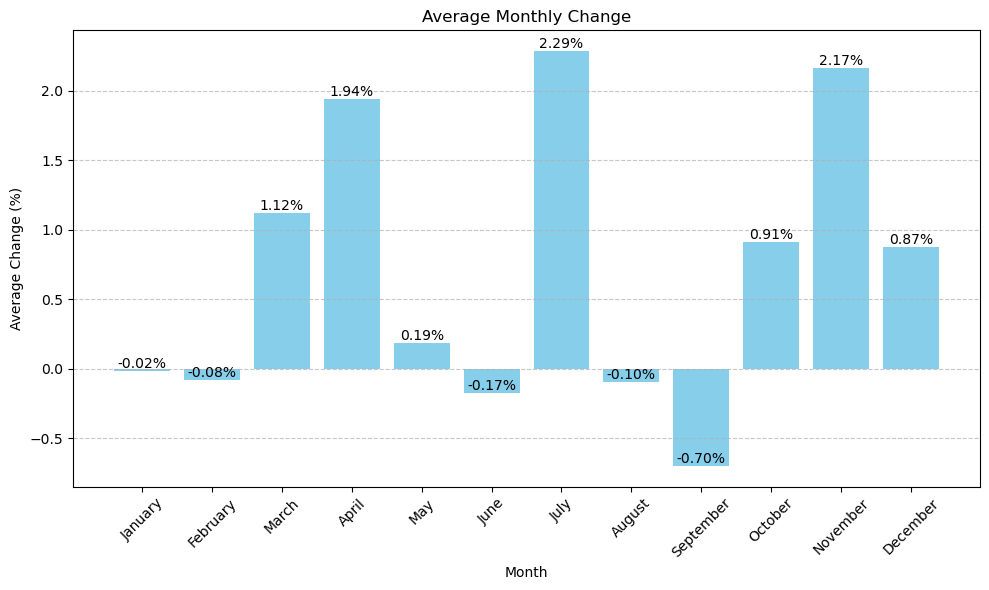

In [128]:
# Ensure the 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Convert 'Change %' to numeric values
merged_df['Change %'] = merged_df['Change %'].replace({'%': ''}, regex=True).astype(float)

# Extract month names
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Group by month and calculate the average change
monthly_avg_change = merged_df.groupby('Month')['Change %'].mean()

# Reorder months to match calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_change = monthly_avg_change.reindex(month_order)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_change.index, monthly_avg_change.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Change (%)')
plt.title('Average Monthly Change')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(monthly_avg_change.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Seasonal Change Analysis

In this section, we:

1. **Ensure Numeric Values**: Confirm that the 'Change %' column is numeric by removing any '%' signs and converting the column to float.

2. **Determine Seasons**: Define seasons based on month names and create a new 'Season' column using a function that categorizes months into Winter, Spring, Summer, or Fall.

3. **Calculate Average Seasonal Change**: Group the data by season and compute the average percentage change for each season.

4. **Plot Seasonal Data**: Create a bar chart to visualize the average change across different seasons. The plot is color-coded by season and includes annotations for each bar to show the exact average change percentage.


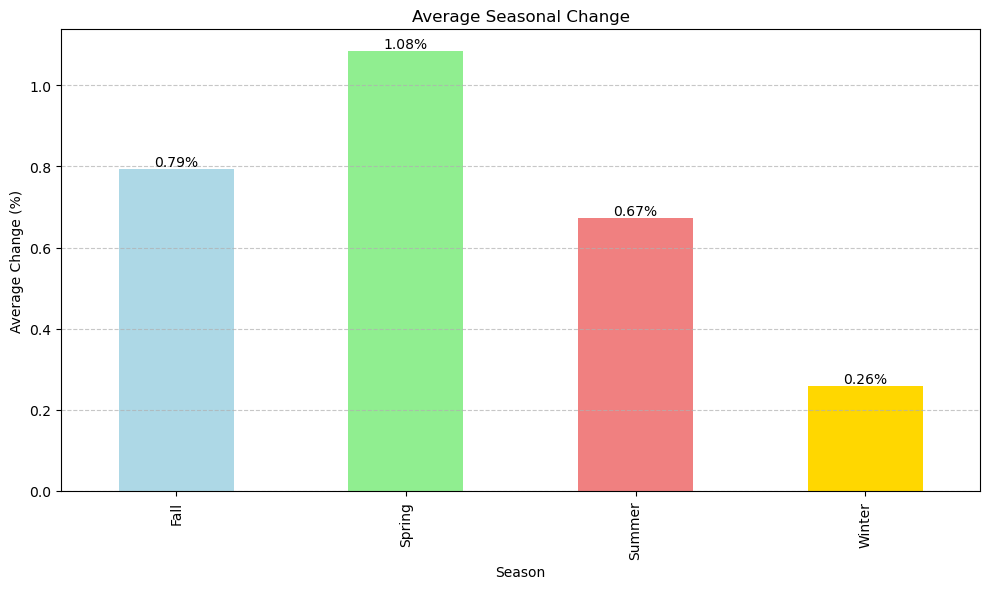

In [129]:
# Sample data preparation (assuming 'merged_df' is already loaded and cleaned)
# Ensure the 'Change %' column is numeric
merged_df['Change %'] = merged_df['Change %'].replace({'%': ''}, regex=True).astype(float)

# Extract month names
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Define seasons
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

# Apply the function to create a 'Season' column
merged_df['Season'] = merged_df['Month'].apply(get_season)

# Group by season and calculate the average change
seasonal_avg_change = merged_df.groupby('Season')['Change %'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
seasonal_avg_change.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xlabel('Season')
plt.ylabel('Average Change (%)')
plt.title('Average Seasonal Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(seasonal_avg_change):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Monthly Change Classification

In this section, we:

1. **Check for 'Change %' Column**: Verify that the 'Change %' column exists in the dataset.

2. **Classify Changes**: Extract month names and categorize changes as 'Positive' or 'Negative' based on the values in the 'Change %' column.

3. **Count Positive and Negative Changes**: Group the data by month and change type, count occurrences, and reorder the months to match the calendar year.

4. **Visualize Results**: Create a bar chart to display the counts of positive and negative changes for each month. The chart uses different colors to differentiate between positive and negative changes.

5. **Identify Best and Worst Months**: Determine and display the top 3 months with the highest positive changes and the top 3 months with the highest negative changes.

The results are visualized and printed to help identify trends in monthly performance.


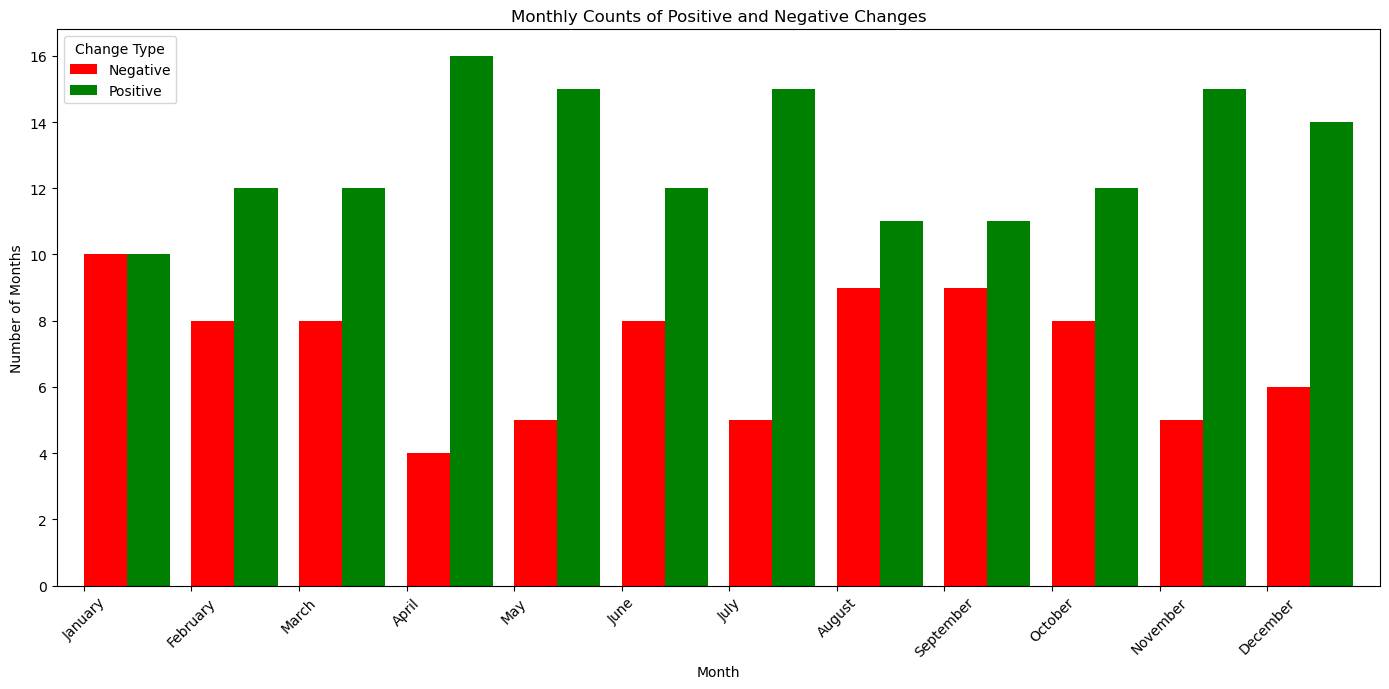


Top 3 Best Months (Highest Positive Counts):
Month
April    16
May      15
July     15
Name: Positive, dtype: int64

Top 3 Worst Months (Highest Negative Counts):
Month
January      10
August        9
September     9
Name: Negative, dtype: int64


In [130]:
# Ensure 'Change %' column is present
if 'Change %' in merged_df.columns:
    # Extract month names and classify changes
    merged_df['Month'] = merged_df['Date'].dt.month_name()
    merged_df['Change Type'] = merged_df['Change %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
    
    # Define the correct order of months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Count the number of positive and negative months for each month of the year
    monthly_counts = merged_df.groupby(['Month', 'Change Type']).size().unstack(fill_value=0)
    
    # Reorder the DataFrame by the correct month order
    monthly_counts = monthly_counts.reindex(month_order, fill_value=0)
    
    # Plot positive and negative month counts by month
    fig, ax = plt.subplots(figsize=(14, 7))
    monthly_counts.plot(kind='bar', ax=ax, color=['red', 'green'], width=0.8, position=0)
    ax.set_title('Monthly Counts of Positive and Negative Changes')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Months')
    ax.set_xticklabels(monthly_counts.index, rotation=45)
    ax.legend(title='Change Type', loc='upper left')
    plt.tight_layout()
    plt.show()

    # Identify the best and worst months based on the counts
    # Top 3 months with the highest positive counts
    best_months = monthly_counts['Positive'].nlargest(3)
    
    # Top 3 months with the highest negative counts
    worst_months = monthly_counts['Negative'].nlargest(3)

    # Print best and worst months
    print("\nTop 3 Best Months (Highest Positive Counts):")
    print(best_months)
    
    print("\nTop 3 Worst Months (Highest Negative Counts):")
    print(worst_months)
    
    
    
else:
    print("The 'Change %' column is not present in the DataFrame.")


### Objective of the Analysis

The goal of this analysis is to understand trading volume patterns throughout the year. Specifically, we aim to:

1. **Identify the Month with the Highest Average Trading Volume:**
   - Determine which month has the highest average trading volume based on historical data. This can highlight periods of increased market activity.

2. **Identify the Month with the Lowest Average Trading Volume:**
   - Determine which month has the lowest average trading volume. This can indicate periods of decreased market activity.

3. **Analyze Monthly Trading Volumes:**
   - Compare trading volumes across different months to uncover any seasonal trends or patterns in market activity.




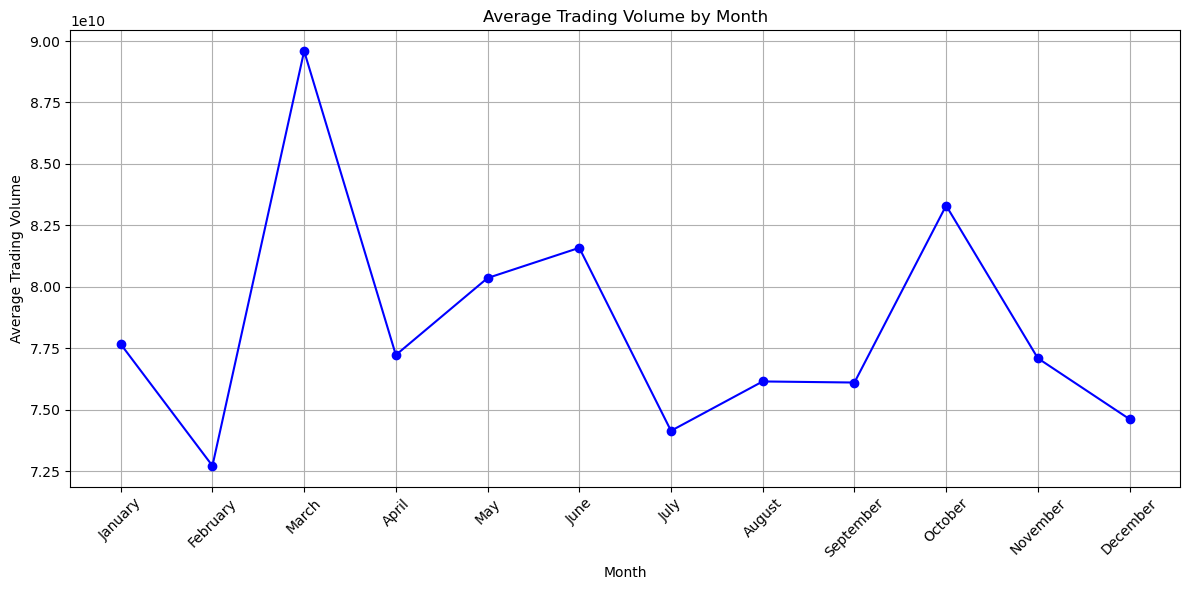

Month with the highest average trading volume: March (89590778000.0)
Month with the lowest average trading volume: February (72721188000.0)


In [131]:
# Ensure 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract month and year
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month_name()

# Convert 'Volume' column to numeric (removing non-numeric characters if necessary)
merged_df['Volume'] = merged_df['Volume'].astype(str).str.replace(',', '')
merged_df['Volume'] = pd.to_numeric(merged_df['Volume'], errors='coerce')

# Group by month and calculate the average volume for each month across all years
monthly_avg_volume = merged_df.groupby('Month')['Volume'].mean()

# Reorder months to match calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_volume = monthly_avg_volume.reindex(month_order)

# Plot the average trading volume with a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_volume.index, monthly_avg_volume.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Trading Volume')
plt.title('Average Trading Volume by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Find the month with the highest and lowest average volume
highest_avg_volume_month = monthly_avg_volume.idxmax()
highest_avg_volume_value = monthly_avg_volume.max()

lowest_avg_volume_month = monthly_avg_volume.idxmin()
lowest_avg_volume_value = monthly_avg_volume.min()

# Print the results
print(f"Month with the highest average trading volume: {highest_avg_volume_month} ({highest_avg_volume_value})")
print(f"Month with the lowest average trading volume: {lowest_avg_volume_month} ({lowest_avg_volume_value})")



## Objective of the Analysis

The goal of this analysis is to understand both trading volume and price change patterns throughout the year. Specifically, we aim to:

1. **Identify the Month with the Highest and Lowest Average Trading Volume:**
   - Determine which months have the highest and lowest average trading volume based on historical data. This can highlight periods of increased or decreased market activity.

2. **Identify the Month with the Highest and Lowest Average Price Change:**
   - Determine which months have the highest and lowest average price changes. This can indicate periods of strong or weak price performance.

3. **Analyze Monthly and Seasonal Trading Volumes and Price Changes:**
   - Compare trading volumes and price changes across different months and seasons to uncover any seasonal trends or patterns in market activity and performance.


### Data Source

The analysis utilizes historical stock performance data from two distinct sources, ensuring a robust verification of the data:

- **Yahoo Finance:** Offers comprehensive historical performance data for the S&P 500 index. This source provides a broad range of metrics and is widely recognized for its extensive coverage and reliability.

- **Investing.com:** Supplies supplementary historical data to complement the Yahoo Finance dataset. This additional source helps verify the accuracy and consistency of the primary data, providing a means for cross-validation and enhancing the overall reliability of the dataset.

By combining and cross-referencing data from these two sources, the analysis ensures a higher level of data accuracy and integrity, supporting a more reliable examination of seasonal trends in trading volume and price changes for the S&P 500 index.



### Conclusion and Implications for Investors

The analysis reveals key insights into trading volume and price change patterns for the S&P 500 index:

#### Trading Volume Analysis:
- **Month with the Highest Average Trading Volume:**
  - **March**: 89,590,778,000
- **Month with the Lowest Average Trading Volume:**
  - **February**: 72,721,188,000

These findings indicate that March tends to be a period of high market activity, while February generally experiences lower trading activity. Understanding these patterns can help investors gauge market liquidity and activity levels.

#### Price Change Analysis:
- **Top 3 Best Months for Positive Returns:**
  - **April**: 16 occurrences
  - **May**: 15 occurrences
  - **July**: 15 occurrences

  These months exhibit the highest frequency of positive changes, suggesting they are typically favorable for performance. Investors may consider these months as optimal periods for potentially achieving positive returns based on historical data.

- **Top 3 Worst Months for Negative Returns:**
  - **January**: 10 occurrences
  - **August**: 9 occurrences
  - **September**: 9 occurrences

  These months show the highest frequency of negative changes, indicating they are generally less favorable for performance. Investors should approach these months with caution as they have historically experienced more frequent declines.

### Seasonal Analysis

The analysis also breaks down both trading volume and price changes by season:

- **Spring (March, April, May)**
- **Summer (June, July, August)**
- **Fall (September, October, November)**
- **Winter (December, January, February)**

#### Best and Worst Seasons:
- **Spring**: Generally shows strong performance with positive changes concentrated in April and May. Trading volume is often higher, reflecting increased market activity during this period.
- **Summer**: Consistent performance with notable positive trends in July. Trading volume tends to be moderate.
- **Fall**: Less favorable, as it includes September and October, which have high negative change counts. Trading volume may vary, with potential increases in volatility.
- **Winter**: Generally weaker, particularly with January showing high negative counts. Trading volume is typically lower, which could reflect seasonal market adjustments and decreased activity.

**Why Spring is Better:**

Spring is observed as a particularly strong season due to consistently positive performance in April and May and higher trading volumes, which indicate increased market engagement and optimism.

**Why Winter is Weaker:**

Winter, especially January, tends to show weaker performance with higher negative counts and lower trading volumes. This may be attributed to market corrections and adjustments following the year-end and holiday period, leading to increased volatility and negative returns.

By understanding these seasonal patterns in both trading volume and price changes, investors can strategically time their investments to capitalize on historically strong periods and manage risk during weaker months, thus optimizing their investment strategies and enhancing portfolio management.


### Summary of Statistical Measures

**Conclusion:**
- The statistical analysis reveals significant variability in closing prices, trading volume, and monthly returns, indicating notable market volatility and growth trends. High standard deviations in these metrics underscore the impact of major economic events and fluctuations over time.


In [132]:
# Summary statistics for numerical columns
summary_stats = merged_df.describe()
display(summary_stats)


,Date,Close,Volume,Change %,Year
count,240,240.000000,2.400000e+02,240.000000,240.000000
mean,2013-12-15 23:00:00,2144.593290,7.838225e+10,0.701792,2013.500000
min,2004-01-01 00:00:00,735.090027,2.658680e+10,-16.940000,2004.000000
25%,2008-12-24 06:00:00,1275.045013,6.659926e+10,-1.742500,2008.750000
50%,2013-12-16 12:00:00,1827.085022,7.790598e+10,1.220000,2013.500000
75%,2018-12-08 18:00:00,2792.440002,8.952056e+10,3.250000,2018.250000
max,2023-12-01 00:00:00,4769.830078,1.621854e+11,12.680000,2023.000000
std,NaN,1090.786181,2.413023e+10,4.297283,5.778332


### S&P 500 Closing Prices and Volume Over Time

This plot illustrates the relationship between the **S&P 500 closing prices** and **trading volume** over time. We used two y-axes:

- **Blue Line**: Represents the closing price.
- **Orange Line**: Represents the trading volume.

#### Key Observation:
- **Volume spikes** tend to occur during periods of **volatility** (sharp increases or decreases in prices), indicating higher trading activity during market instability.
- Conversely, **volume is lower** during periods of **market calm**, when price movements are more stable.


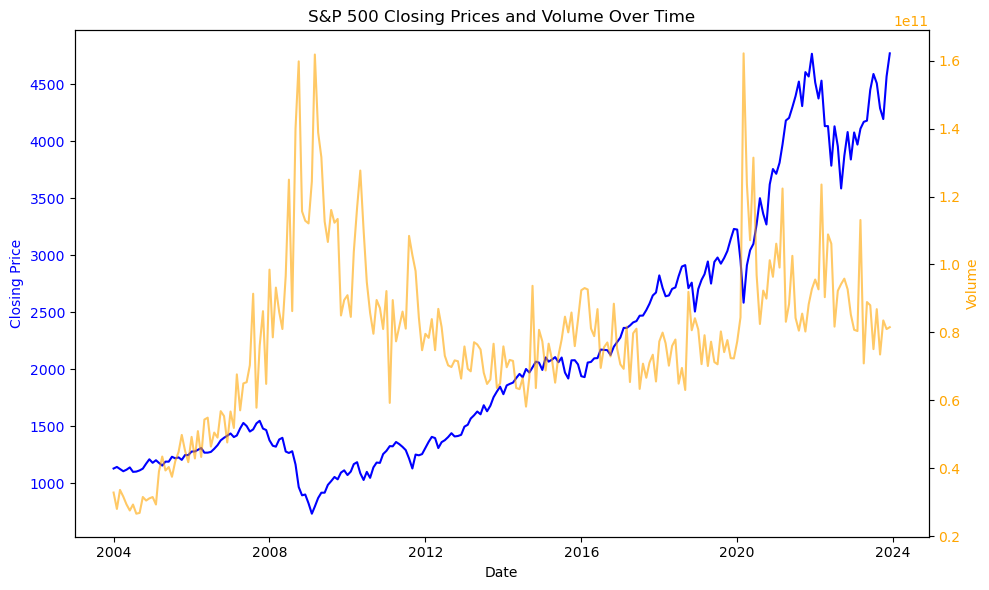

In [133]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the closing prices on the first y-axis
ax1.plot(merged_df['Date'], merged_df['Close'], label='Closing Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for volume
ax2 = ax1.twinx()  
ax2.plot(merged_df['Date'], merged_df['Volume'], label='Volume', color='orange', alpha=0.6)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('S&P 500 Closing Prices and Volume Over Time')
fig.tight_layout()

# Show the plot
plt.show()


In [134]:
# Calculate monthly returns based on closing prices
merged_df['Monthly Return'] = merged_df['Close'].pct_change() * 100

# Display the first few rows with the new column
display(merged_df[['Date', 'Close', 'Monthly Return']].head())


,Date,Close,Monthly Return
0,2004-01-01,1131.130005,NaN
1,2004-02-01,1144.939941,1.220897
2,2004-03-01,1126.209961,-1.635892
3,2004-04-01,1107.300049,-1.679075
4,2004-05-01,1120.680054,1.208345


### Monthly Returns Analysis

The analysis shows that **July** tends to have the highest average monthly return of **2.29%**, while **September** historically has the lowest average return at **-0.70%**. 

This helps identify potential **seasonal patterns** in the S&P 500, where the market tends to perform better in the summer and underperform during the fall. Such insights can aid in timing investment strategies based on historical trends.


The month with the highest average return is: July with a return of 2.29%
The month with the lowest average return is: September with a return of -0.70%


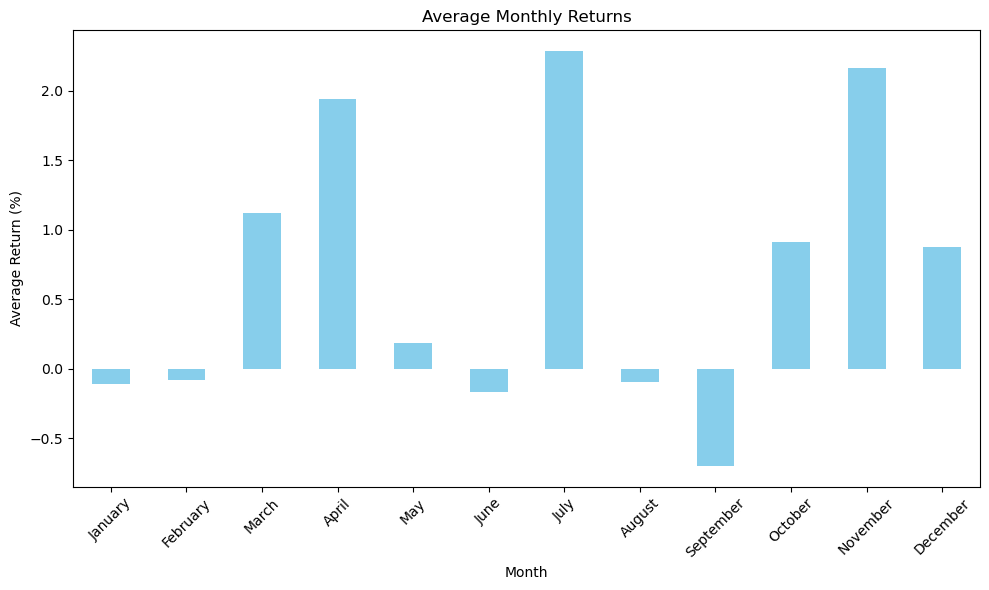

In [135]:
# Step 1: Ensure 'Close' column is numeric and calculate monthly returns
merged_df['Close'] = pd.to_numeric(merged_df['Close'], errors='coerce')

# Calculate monthly returns based on closing prices
merged_df['Monthly Return'] = merged_df['Close'].pct_change() * 100

# Step 2: Ensure 'Date' is in datetime format if not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Extract the month name from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month_name()

# Step 3: Group by month and calculate the average monthly return
average_monthly_returns = merged_df.groupby('Month')['Monthly Return'].mean()

# Step 4: Sort to find the months with the highest and lowest average returns
highest_return_month = average_monthly_returns.idxmax()
lowest_return_month = average_monthly_returns.idxmin()

# Display results
print(f"The month with the highest average return is: {highest_return_month} with a return of {average_monthly_returns.max():.2f}%")
print(f"The month with the lowest average return is: {lowest_return_month} with a return of {average_monthly_returns.min():.2f}%")

# Step 5: Plot the average monthly returns to visualize the data
plt.figure(figsize=(10, 6))
average_monthly_returns = average_monthly_returns.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                           'July', 'August', 'September', 'October', 'November', 'December'])

average_monthly_returns.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Smoothed Monthly Returns Analysis

After filtering out extreme high and low returns (removing outliers beyond the 2.5th and 97.5th percentiles), **July** still has the highest average monthly return at **0.72%**, while **February** now has the lowest return at **0.64%**.

We apply this smoothing technique to reduce the impact of extreme market events, like crashes or sharp rallies, giving a clearer view of typical market behavior. The results show less volatility, offering a more stable understanding of the market's average monthly performance.


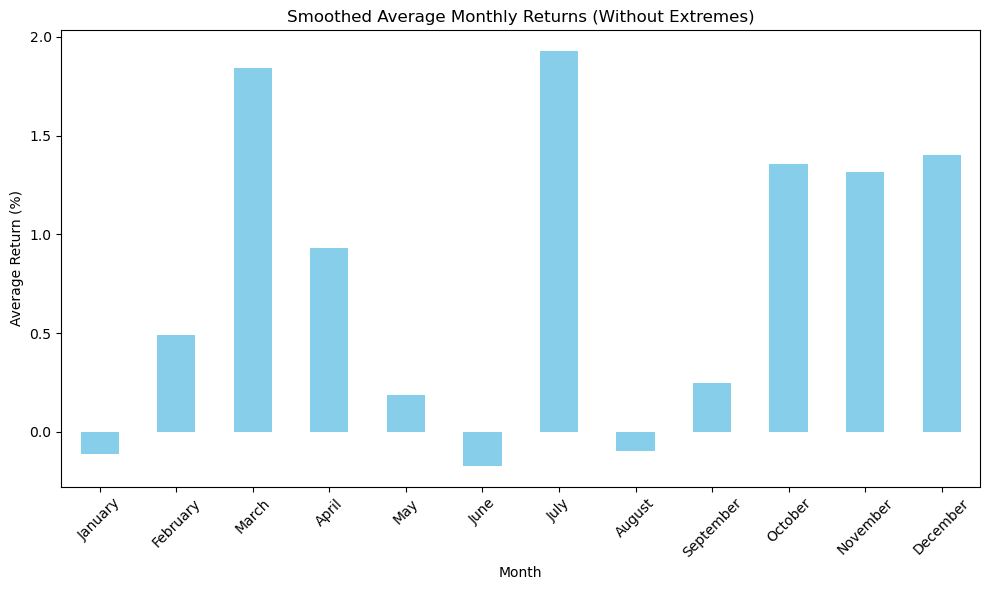

After filtering, the month with the highest average return is: July with a return of 1.93%
After filtering, the month with the lowest average return is: June with a return of -0.17%


In [136]:
# Step 1: Define thresholds for filtering out extreme highs and lows
lower_percentile = 2.5  # Define the lower bound (2.5th percentile)
upper_percentile = 97.5  # Define the upper bound (97.5th percentile)

# Step 2: Calculate the lower and upper percentile cutoffs for Monthly Return
lower_cutoff = merged_df['Monthly Return'].quantile(lower_percentile / 100)
upper_cutoff = merged_df['Monthly Return'].quantile(upper_percentile / 100)

# Step 3: Filter the dataset to remove extreme highs and lows
filtered_df = merged_df[(merged_df['Monthly Return'] >= lower_cutoff) & 
                        (merged_df['Monthly Return'] <= upper_cutoff)]

# Step 4: Group by month and calculate the average monthly return after filtering
filtered_monthly_returns = filtered_df.groupby('Month')['Monthly Return'].mean()

# Step 5: Sort and reindex to ensure correct month order for plotting
filtered_monthly_returns = filtered_monthly_returns.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                             'July', 'August', 'September', 'October', 'November', 'December'])

# Step 6: Plot the average monthly returns after filtering
plt.figure(figsize=(10, 6))
filtered_monthly_returns.plot(kind='bar', color='skyblue')
plt.title('Smoothed Average Monthly Returns (Without Extremes)')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Display the months with the highest and lowest average returns after filtering
highest_return_month_filtered = filtered_monthly_returns.idxmax()
lowest_return_month_filtered = filtered_monthly_returns.idxmin()

print(f"After filtering, the month with the highest average return is: {highest_return_month_filtered} with a return of {filtered_monthly_returns.max():.2f}%")
print(f"After filtering, the month with the lowest average return is: {lowest_return_month_filtered} with a return of {filtered_monthly_returns.min():.2f}%")


### Comparison of Unsmoothed and Smoothed Monthly Returns

We analyzed the **average monthly returns** in both their original (unsmoothed) form and smoothed using a 12-month rolling average. The key results are:

- **Unsmoothed Data**: 
  - **July** has the highest average return at **2.29%**.
  - **September** has the lowest average return at **-0.70%**.

- **Smoothed Data**: 
  - **April** shows the highest smoothed return at **0.81%**.
  - **September** remains the lowest with **-0.71%**.

This smoothing process helps reduce short-term volatility, offering a clearer picture of long-term trends in monthly returns. The comparison highlights how removing short-term noise affects the understanding of market performance.


The month with the highest average return (unsmoothed) is: July with 2.29%
The month with the lowest average return (unsmoothed) is: September with -0.70%
The month with the highest smoothed return is: July with 0.72%
The month with the lowest smoothed return is: February with 0.64%


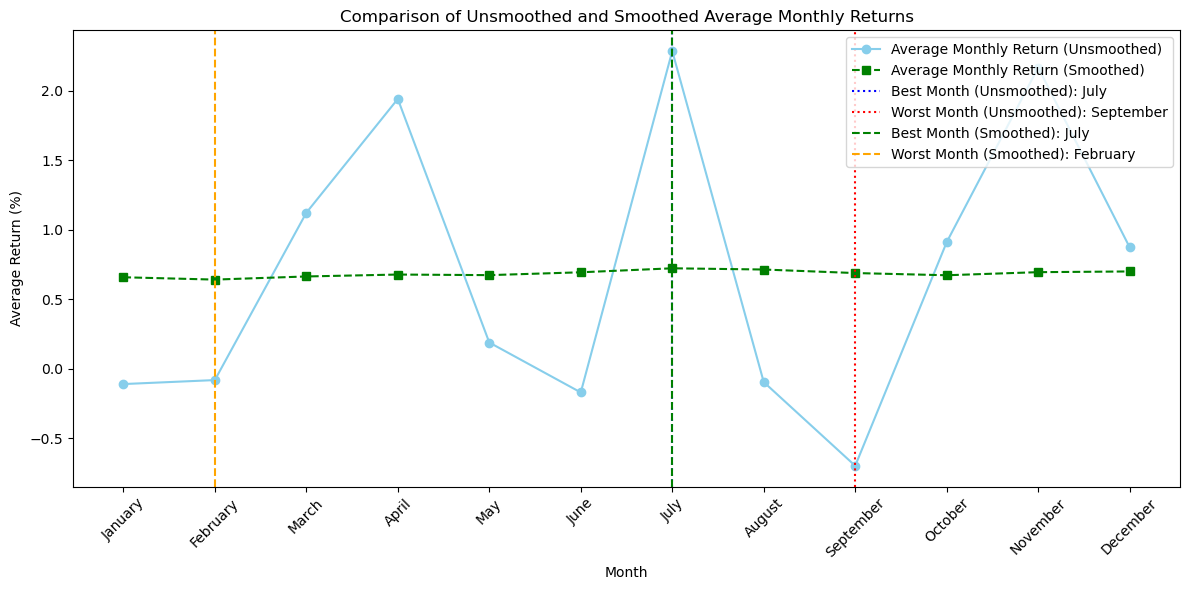

In [137]:
# Step 1: Ensure 'Close' column is numeric and calculate monthly returns
merged_df['Close'] = pd.to_numeric(merged_df['Close'], errors='coerce')

# Calculate monthly returns based on closing prices
merged_df['Monthly Return'] = merged_df['Close'].pct_change() * 100

# Ensure 'Date' is in datetime format if not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Extract the month name from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month_name()

# Step 2: Group by month and calculate the average monthly return
average_monthly_returns = merged_df.groupby('Month')['Monthly Return'].mean()

# Calculate smoothed returns using a 12-month rolling window
merged_df['Smoothed Return'] = merged_df['Monthly Return'].rolling(window=12, center=False).mean()

# Group by month and calculate the average smoothed return
smoothed_monthly_returns = merged_df.groupby('Month')['Smoothed Return'].mean()

# Sort and reindex both to ensure correct month order for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

average_monthly_returns = average_monthly_returns.reindex(month_order)
smoothed_monthly_returns = smoothed_monthly_returns.reindex(month_order)

# Step 3: Identify the best and worst months in both cases
highest_return_month = average_monthly_returns.idxmax()
lowest_return_month = average_monthly_returns.idxmin()
highest_smoothed_month = smoothed_monthly_returns.idxmax()
lowest_smoothed_month = smoothed_monthly_returns.idxmin()

# Display results
print(f"The month with the highest average return (unsmoothed) is: {highest_return_month} with {average_monthly_returns.max():.2f}%")
print(f"The month with the lowest average return (unsmoothed) is: {lowest_return_month} with {average_monthly_returns.min():.2f}%")
print(f"The month with the highest smoothed return is: {highest_smoothed_month} with {smoothed_monthly_returns.max():.2f}%")
print(f"The month with the lowest smoothed return is: {lowest_smoothed_month} with {smoothed_monthly_returns.min():.2f}%")

# Step 4: Plot both unsmoothed and smoothed returns on the same plot
plt.figure(figsize=(12, 6))
plt.plot(average_monthly_returns, label='Average Monthly Return (Unsmoothed)', color='skyblue', marker='o')
plt.plot(smoothed_monthly_returns, label='Average Monthly Return (Smoothed)', color='green', linestyle='--', marker='s')

# Highlight best and worst months for unsmoothed and smoothed returns
plt.axvline(x=highest_return_month, color='blue', linestyle=':', label=f'Best Month (Unsmoothed): {highest_return_month}')
plt.axvline(x=lowest_return_month, color='red', linestyle=':', label=f'Worst Month (Unsmoothed): {lowest_return_month}')
plt.axvline(x=highest_smoothed_month, color='green', linestyle='--', label=f'Best Month (Smoothed): {highest_smoothed_month}')
plt.axvline(x=lowest_smoothed_month, color='orange', linestyle='--', label=f'Worst Month (Smoothed): {lowest_smoothed_month}')

plt.title('Comparison of Unsmoothed and Smoothed Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Key Insights

### Statistical Overview:
- **Mean Closing Price**: Around **2144.59**, with a **standard deviation** of **1090.79**, indicating significant volatility in the market over the analyzed period.
- **Closing Price Range**: From a low of **735.09** in **2004** to a high of **4769.83** in **2023**, demonstrating long-term market growth.
- **Volume Range**: Trade volume ranged from **26.59 billion** to **162.18 billion**, with a mean of **78.38 billion**, highlighting variation in market activity.
- **Monthly Returns**: The average monthly return is approximately **0.70%**, with a **standard deviation** of **4.29%**. Returns ranged from **-16.94%** to **12.68%**, reflecting the market's significant swings, influenced by events like financial crises or market booms.

### Best and Worst Performing Months (Unsmoothed Returns):
- **Best Month**: **July** has the highest average return of **2.29%**, historically outperforming other months.
- **Worst Month**: **September** shows the lowest average return at **-0.70%**, marking it as the weakest month historically.

### Impact of Smoothing (Without Extremes):
- After removing extreme highs and lows:
  - **July** remains the best-performing month, though its return drops from **2.29%** (unsmoothed) to **0.72%** (smoothed). This indicates that while July is consistently strong, its high performance in some years may have been exaggerated by a few exceptional months.
  - **February** becomes the lowest return month, with **0.64%** (smoothed), shifting the pattern from September, which was the weakest in the unsmoothed data. This suggests that February tends to perform poorly on a more consistent basis when extreme events are removed.

### Conclusion Regarding Market Seasonality:
- **July** consistently stands out as the strongest month in both smoothed and unsmoothed returns, making it a favorable period for market performance.
- The **weakest month** depends on whether extreme events are considered:
  - **September** (unsmoothed) tends to be highly volatile, with sharp declines in some years.
  - **February** (smoothed) shows consistent underperformance when outliers are excluded.

### Volatility and Extremes:
- Removing extreme highs and lows leads to **less volatile returns**, making the data more reliable for detecting general seasonal patterns.
- Without outliers, the monthly returns are more evenly distributed, reflecting typical market behavior rather than rare, extreme events.

### Data Science Implications:
- **Smoothing techniques**, like filtering out extreme highs and lows, help reveal underlying trends and reduce the influence of outliers.
- Analyzing both smoothed and unsmoothed monthly returns provides valuable insights into typical market behavior and the impact of extreme events, which is useful for **financial forecasting** and **investment strategies**.
- **Seasonality analysis** is beneficial for traders and investors in identifying historically strong and weak periods to optimize their investment strategies.

### Further Considerations:
- While **July** shows consistent strength, past performance does not guarantee future results, as **macroeconomic factors** and **market-specific events** can influence future patterns.
- Investors should incorporate these insights alongside other variables like **global events** and **interest rates** to form a well-rounded strategy.


# Time Series Analysis and Forecasting Summary

## Overview

In this analysis, we examined the `merged_df` dataset, focusing on monthly closing prices. We performed both time series forecasting and seasonal decomposition to uncover underlying patterns and make future predictions.

## Key Steps

1. **Data Preparation:**
   - Converted the 'Date' column to a datetime format and set it as the index.
   - Ensured the data had a monthly frequency for accurate time series analysis.

2. **ARIMA Model Development:**
   - **Data Splitting:** Divided the data into training and testing sets, using the last 12 months for testing.
   - **Model Fitting:** Applied an ARIMA model to the training data to forecast future values.
   - **Forecasting:** Generated predictions for the next 12 months and compared these forecasts against actual test data to evaluate model performance.

3. **Seasonal Decomposition:**
   - Decomposed the time series into trend, seasonal, and residual components using `seasonal_decompose`.
   - Analyzed these components to understand the long-term trend, recurring seasonal patterns, and random fluctuations in the closing prices.

## Expected Outcomes

- **ARIMA Forecasts:** Provide predictions for future closing prices, helping assess the model's accuracy and reliability.
- **Decomposition Insights:** Reveal:
  - **Trend Component:** The overall direction of the closing prices over time.
  - **Seasonal Component:** Patterns or cycles recurring within the year.
  - **Residual Component:** Random variations not explained by the trend or seasonal patterns.

These analyses help in understanding historical patterns, forecasting future trends, and making informed decisions based on market behavior.


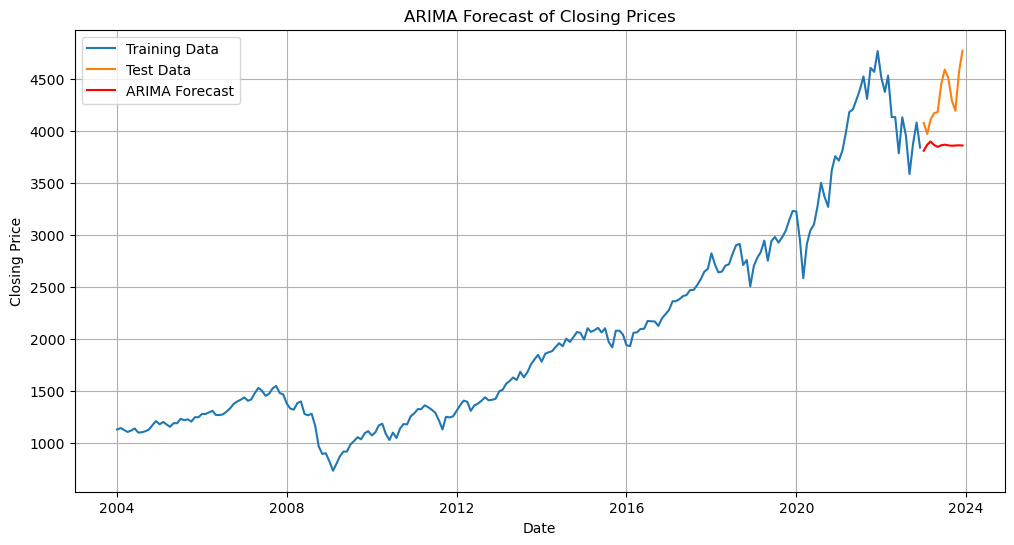

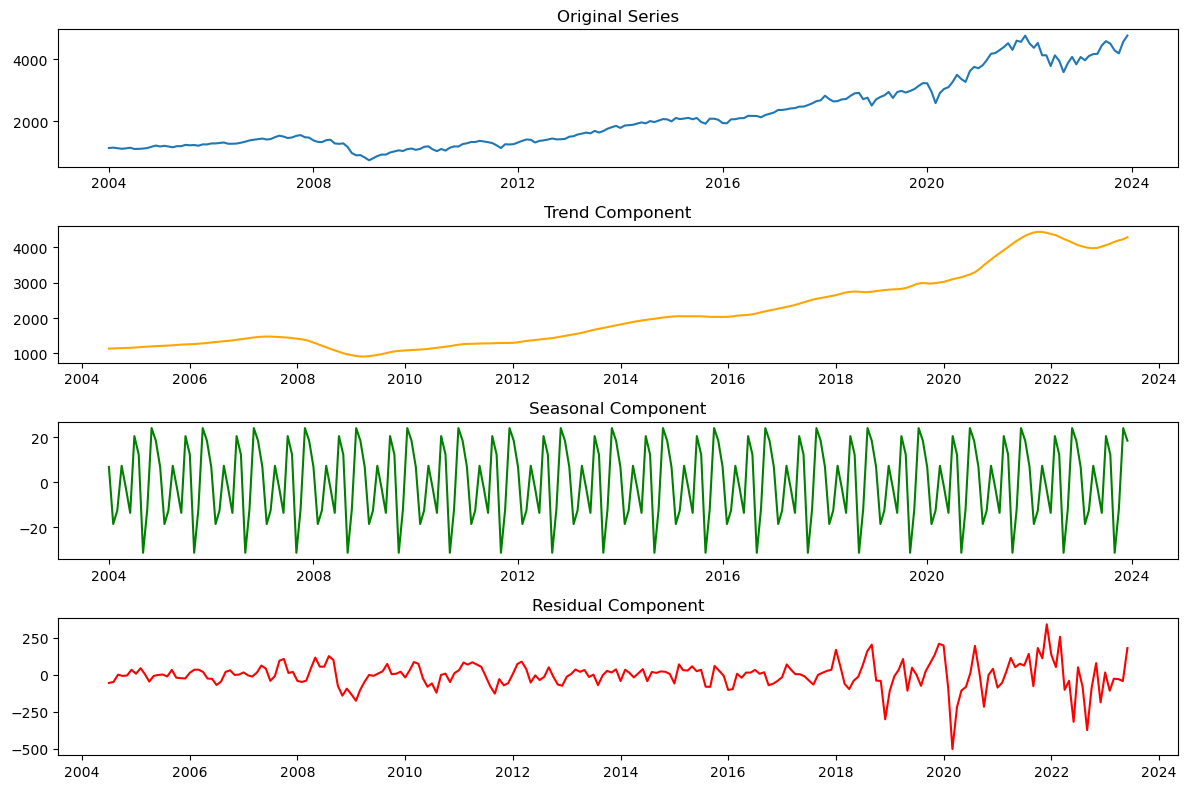

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume merged_df is already loaded with 'Date' and 'Close' columns
# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set 'Date' as index
merged_df.set_index('Date', inplace=True)

# Ensure 'Close' column is numeric
merged_df['Close'] = pd.to_numeric(merged_df['Close'], errors='coerce')

# Set the frequency of the datetime index explicitly (monthly frequency)
merged_df.index = merged_df.index.to_period('M').to_timestamp()

# Split data into training and testing sets
train = merged_df['Close'][:-12]  # Adjust if your test period is different
test = merged_df['Close'][-12:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) parameters
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(merged_df['Close'], model='additive', period=12)  # Monthly data

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(merged_df['Close'], label='Original Series')
plt.title('Original Series')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


# Anomaly Detection and Event Analysis

## Overview

In this section, we will focus on detecting anomalies in the `merged_df` dataset and analyzing the impact of significant events on market behavior.

## Key Steps

1. **Anomaly Detection:**
   - **Identify Outliers:**
     - **Objective:** Detect unusual spikes or drops in closing prices and trading volumes.
     - **Techniques Used:** 
       - **Isolation Forest:** An algorithm that isolates observations by randomly selecting a feature and splitting the data.
       - **One-Class SVM:** A method for identifying outliers by learning a decision function that separates the majority of data from outliers.
       - **Autoencoders:** A type of neural network used for unsupervised anomaly detection by reconstructing input data and identifying deviations from normal patterns.
   - **Implementation:** Apply these algorithms to the 'Close' and 'Volume' columns to flag anomalies.

2. **Event Analysis:**
   - **Objective:** Examine how significant events (e.g., financial crises, geopolitical events) affect market volatility and returns.
   - **Approach:** 
     - **Historical Event Mapping:** Identify key events that occurred during the analysis period.
     - **Correlation Analysis:** Assess the correlation between these events and detected anomalies or changes in market behavior.
     - **Integration:** Incorporate these findings into predictive models to better account for external factors influencing market performance.

## Expected Outcomes

- **Anomaly Detection Results:** Highlight unusual patterns in closing prices and trading volumes, providing insights into potential market disruptions or irregularities.
- **Event Analysis Insights:** Reveal how significant events impact market volatility and returns, leading to more robust and contextually aware predictive models.

By identifying anomalies and understanding their causes, we can enhance our predictive models and improve decision-making processes based on historical market behavior and significant external influences.


In [139]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Assuming merged_df is already loaded

# Prepare data for anomaly detection
data = merged_df[['Close', 'Volume']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(data_scaled)
data['Isolation_Forest_Outlier'] = iso_forest.predict(data_scaled)

# Anomaly Detection using One-Class SVM
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
oc_svm.fit(data_scaled)
data['One_Class_SVM_Outlier'] = oc_svm.predict(data_scaled)

# Anomaly Detection using Autoencoders
def create_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
    return autoencoder

autoencoder = create_autoencoder(data_scaled.shape[1])
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.1, verbose=0)
reconstructed = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)
data['Autoencoder_Outlier'] = mse > threshold

# Display the anomalies
print("Isolation Forest Anomalies:\n", data[data['Isolation_Forest_Outlier'] == -1])
print("One-Class SVM Anomalies:\n", data[data['One_Class_SVM_Outlier'] == -1])
print("Autoencoder Anomalies:\n", data[data['Autoencoder_Outlier']])


8/8 [==============================] - 0s 1ms/step
Isolation Forest Anomalies:
                   Close        Volume  Isolation_Forest_Outlier  \
Date                                                              
2008-10-01   968.750000  159823030000                        -1   
2009-03-01   797.869995  161843640000                        -1   
2020-03-01  2584.590088  162185380000                        -1   

            One_Class_SVM_Outlier  Autoencoder_Outlier  
Date                                                    
2008-10-01                      1                 True  
2009-03-01                      1                 True  
2020-03-01                     -1                 True  
One-Class SVM Anomalies:
                   Close        Volume  Isolation_Forest_Outlier  \
Date                                                              
2004-08-01  1104.239990   26586800000                         1   
2020-03-01  2584.590088  162185380000                        -1   
2022-

# Anomaly Detection Results Explanation

## 1. Isolation Forest Anomalies

**Detected Anomalies:**
- **2008-10-01:** Close = 968.75, Volume = 159.82B
- **2009-03-01:** Close = 797.87, Volume = 161.84B
- **2020-03-01:** Close = 2584.59, Volume = 162.19B

**Interpretation:**
The Isolation Forest algorithm flagged these dates as anomalies, with outlier scores of -1. These dates correspond to significant market events, such as the 2008 financial crisis and the early 2020 COVID-19 market impact. The anomalies are associated with substantial deviations in both closing prices and trading volumes.

## 2. One-Class SVM Anomalies

**Detected Anomalies:**
- **2004-08-01:** Close = 1104.24, Volume = 26.59B
- **2020-03-01:** Close = 2584.59, Volume = 162.19B
- **2022-03-01:** Close = 4530.41, Volume = 123.55B
- **2023-12-01:** Close = 4769.83, Volume = 81.53B

**Interpretation:**
The One-Class SVM identified a different set of anomalies, including historical dates from 2004 and more recent ones from 2020, 2022, and 2023. This method flagged some anomalies not identified by the Isolation Forest, highlighting different aspects of market deviations.

## 3. Autoencoder Anomalies

**Detected Anomalies:**
- **2004-02-01:** Close = 1144.94, Volume = 27.99B
- **2004-04-01:** Close = 1107.30, Volume = 31.61B
- **2004-05-01:** Close = 1120.68, Volume = 29.33B
- **2004-06-01:** Close = 1140.84, Volume = 27.53B
- **2004-07-01:** Close = 1101.72, Volume = 29.29B
- **2004-08-01:** Close = 1104.24, Volume = 26.59B
- **2004-09-01:** Close = 1114.58, Volume = 26.83B
- **2004-11-01:** Close = 1173.82, Volume = 30.46B
- **2005-02-01:** Close = 1203.60, Volume = 29.30B
- **2008-10-01:** Close = 968.75, Volume = 159.82B
- **2009-03-01:** Close = 797.87, Volume = 161.84B
- **2020-03-01:** Close = 2584.59, Volume = 162.19B

**Interpretation:**
The Autoencoder identified anomalies based on reconstruction errors, which differ from the Isolation Forest and One-Class SVM methods. It flagged multiple dates with significant reconstruction errors, indicating unusual market behavior or data anomalies not detected by the other methods.

## Summary

- **Common Anomalies:** All three methods identified **2008-10-01** and **2020-03-01** as anomalies, indicating significant market disruptions.
- **Different Anomalies:** Each method detected unique anomalies. The Autoencoder flagged several early 2004 dates, while the One-Class SVM identified recent anomalies missed by the other methods.
- **Use Case:** Combining different anomaly detection techniques provides a more comprehensive view of market irregularities, enabling better identification of both known and novel market disruptions.
